In [11]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#Some code to beautify the plots
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

### Subspace iteration

In [12]:
def subspace_sym(A, k, p = 10, maxiter = 10):
    n = A.shape[1]
    Z = np.random.randn(n, k + p)
    AZ = A @ Z
    Anrm = np.linalg.norm(A, 2)
    
    reslst = []
    for j in range(maxiter):
        
        Z, _ = np.linalg.qr(AZ, mode = 'reduced')
        AZ = A @ Z
        
        T = Z.T @ AZ 
        D,W = np.linalg.eigh(T)
        
        ind = np.argsort(D)[::-1]
        W = W[:,::-1]
        D = D[::-1]
        
        V  = Z @ W
        AV = AZ @ W
        
        res = np.apply_along_axis(np.linalg.norm, 0, AV - V @ np.diag(D))/Anrm
        reslst.append(res)
        
    return reslst, D
    

Text(0.5, 1.0, 'Residual Norm')

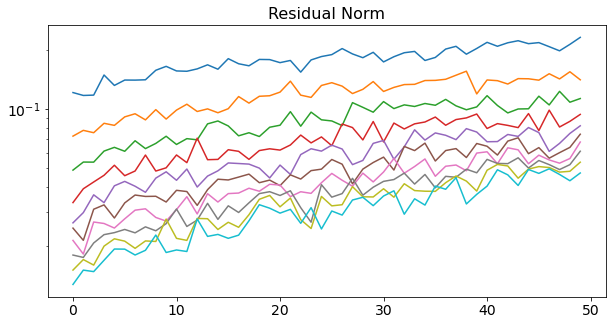

In [20]:
n = 250
ones = np.ones((n,), dtype = 'd')
A = 2*np.diag(ones,0) - np.diag(ones[:-1], -1) - np.diag(ones[:-1], 1)
b = np.random.randn(n)

res, d = subspace_sym(A, 30, 20, 10)
plt.figure()
for j in range(len(res)):
    plt.semilogy(res[j])
plt.title('Residual Norm', fontsize = 16)

### Example: matrix with decaying eigenvalues

Text(0.5, 1.0, 'Residual Norm')

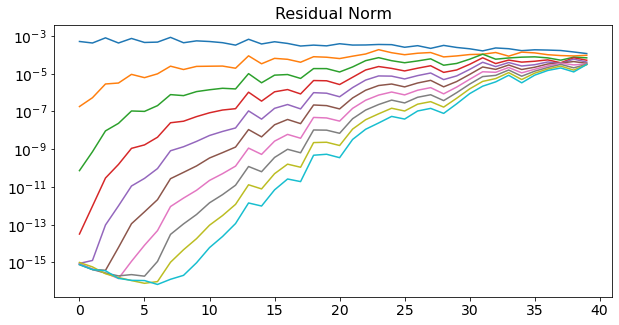

In [21]:
n = 250
x = np.linspace(0,1,n)
X,Y = np.meshgrid(x,x)

A = np.exp(-np.abs(X-Y)/0.5)

res, d = subspace_sym(A, 30, 10, 10)
plt.figure()
for j in range(len(res)):
    plt.semilogy(res[j])
plt.title('Residual Norm', fontsize = 16)